# Métodos III - Conceptos


**Course: "Métodos III - Derivadas en varias dimensiones"**

*Author: Jose A. Hernando*, January 2018

*Particle Physics Deparment. Universidade de Santiago de Compostela, Spain.*

Vamos a intruducir los conceptos relevantes del primer tema del curso:
* las funciones escalares, 
* la parametrización de curvas y superficies, 
* los conjuntos de nivel
* los máximos y mínimos de funciones de varias dimensiones.

In [1]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

from mpl_toolkits.mplot3d import Axes3D
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

# ploting images
from IPython.display import display, Image

----

## 1- Rectas y planos

### Ecuación de una recta

    Vamos a dibujar una recta en matplotlib

In [2]:
def plot_axis(ax):
    """ draw the x and y axis on the frame 'ax'
    """
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_position(('data',0))
    return 

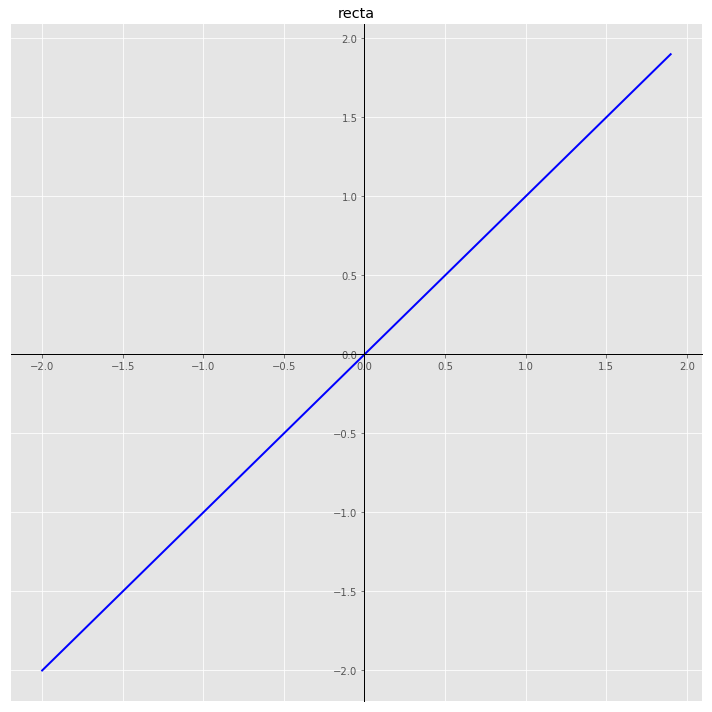

In [3]:
# create a figure and a frame (axis)
fig, ax = plt.subplots(figsize=(10, 10))

# create an array from [-2., 2.] in steps of 0.1 (mathematically this is a partition)
xs   = np.arange(-2., 2., 0.1)
# the parameters of the stright line, a: slope, b: offset
a, b = 1., 0.
# the equation of the straight line, y is now an array of the same dimension of x,
ys   = a*xs + b

# plot the straight line with blue color and line width 2
ax.plot(xs, ys, color='blue', lw=2)

# plot the axis (the function we have declared aboce)
plot_axis(ax)

# set the title
ax.set_title('recta')
# make the figure nicer
fig.tight_layout();

**Cuestión:** La figura es la gráfica de una recta. ¿Cuál es la ecuación que cumplen los puntos de la recta? ¿Cuál es su pendiente? ¿Cuál es la derivada de la función? ¿Es igual para todos los $x$s?

**Prueba:** Cambia los parámetros, *a, b* de la ecuación de la recta y dibuja nuevamente.

**Prueba:** Dibuja la recta que pasa por los puntos {(0, 1), (2, 0)}. Dibuja la recta que pasa por el punto (0, -1) con pendiente -1.

**Cuestión:** ¿Cuál es la ecuación de una recta con pendiente *m* que pasa por el punto $(x_0, y_0)$? ¿Cuál es la ecuación de una recta horizontal que pasa por $y_0$? ¿Y vertical que pasa por $x_0$? 

*Atajo:* puedes hacer el siguiente atajo para dibujar una gráfica

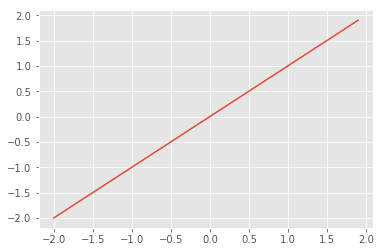

In [4]:
xs   = np.arange(-2., 2., 0.1)
a, b = 1., 0. 
ys   = a*xs + b
plt.plot(xs, ys);

### Ecuación de un plano

    Vamos a dibujar un plano en matplotlib

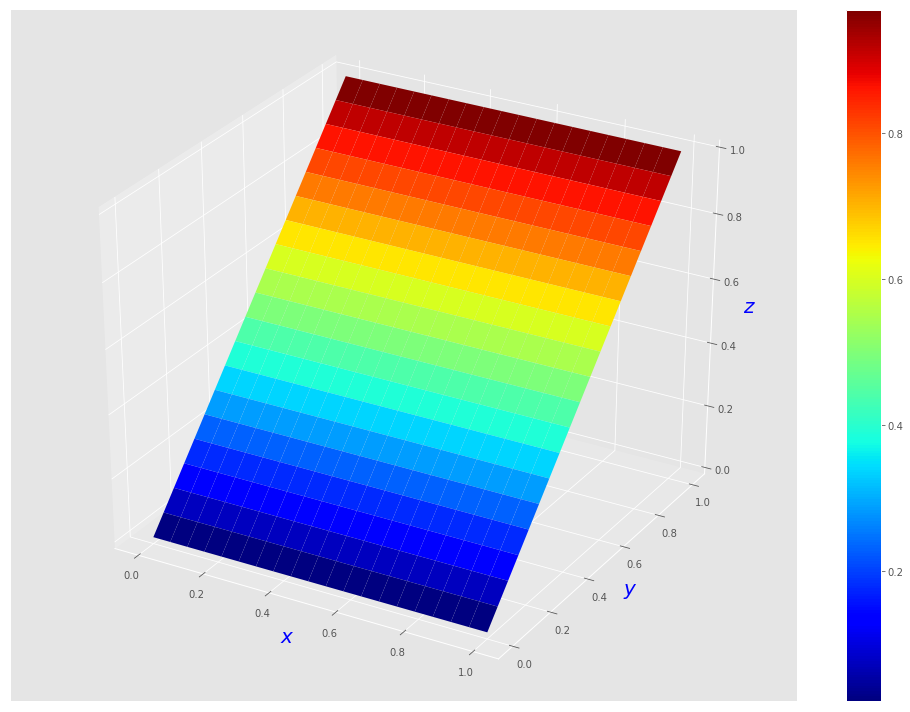

In [5]:
# create a figure
fig = plt.figure(figsize=(14, 10))
# create a 'frame' (axis) for 3D projections
ax = fig.add_subplot(1, 1, 1, projection='3d')

# create two arrays, xs, ys, with 20 points equally spaced between [0., 1]
xs = np.linspace(0., 1., 20)
ys = np.linspace(0., 1., 20)

# create a 2D mesh with the (xs, ys), 
xms, yms = np.meshgrid(xs, ys)
# check: for a bin (i, j), xms(i, j)= xs(i), yms(i, j) = ys(i) 

# parameters of the plane, a, b, c. Slope in x: a, slope in y: b, z-offset at origin: c
a, b, c  = 0., 1., 0. 

# zms is the values of the plane
zms      = a*xms+b*yms+c

cmap = plt.cm.jet

# plot the surface
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)

# set the labels
ax.set_xlabel('$x$', fontsize=20, color='blue')
ax.set_ylabel('$y$', fontsize=20, color='blue')
ax.set_zlabel('$z$', fontsize=20, color='blue')
# ax.set_zlim([0., 2.])
# set the colorbar
fig.colorbar(sf, ax=ax);

# do the figure nicer
fig.tight_layout();

**Cuestión:** La figura es un plano. ¿Dónde está el origen? ¿Cual es el valor de $z$ en el origen? Fíjate en $y=0$, ¿es una recta? ¿Qué pendiente tiene? Fíjate en $y=1$, ¿es una recta? ¿qué pendiente tiene? ¿Cuál es su pendiente en la dirección $x$? ¿y en $y$? ¿Cuál es la ecuación de este plano?

**Cuestión:** ¿Cuál es la ecuación genérica de un plano que pasa por el punto $(x_0, y_0, z_0)$ y tiene una pendiente en $x$ de $a$ y en $y$ de $b$?

**Prueba**: Modifica el código anterior para dibujar un plano que pasa por el punto $(0, 0, 1)$ y tiene como pendiente en $x$, $a=-1$ y en $y$, $b=1$

----

## Límites, continuidad

### Límites y continuidad en 1D

Vamos a dibujar una función 1D, en concreto $f(x) = \sin(x)/x$ como una curva y estudiar sus límites y su continuidad. 

**Cuestión**: ¿Es la función $f(x)=\sin(x)/x$ continua en el $x=0$?

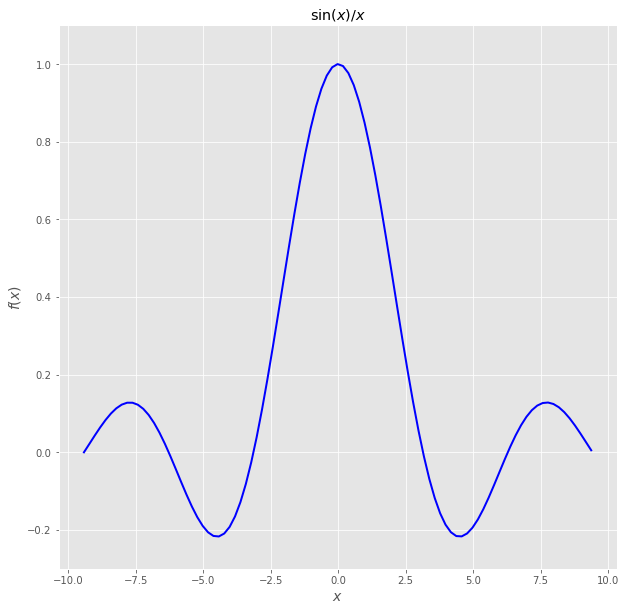

In [6]:
# create a figure and a 'frame' (axis)
fig, ax = plt.subplots(figsize=(10, 10))

# create an array between [-3 pi, 3 pi] in units of 0.2
xs = np.arange(-3.*np.pi, 3.*np.pi, 0.2)
# compute the function sin(x)/x for the xs array
ys = np.sin(xs)/xs

# plot the arrays, that simulates plotting the function
ax.plot(xs, ys, color='blue', lw=2)

# set the titles
ax.set_ylim([-0.3, 1.1])
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$f(x)$', fontsize=14)
ax.set_title('$\sin(x)/x$');
# set a range limit in y

**Cuestión:** La imagen es la gráfica de la función $f(x) = \sin(x)/x$. ¿La función tienen límite en el origen? ¿Es continua? ¿Tiene derivadas en todos los puntos? ¿En qué puntos sus derivadas son nulas?

**Cuestión:** A partir de la gráfica, ¿Cuáles son los valores de $x$ en los que la derivada es nula?

**Cuestión:** ¿Cuándo la función es nula? ¿Cuáles son los puntos máximos y mínimos?

**Prueba:** Dibuja la función $f(x) = (1-cos(x))/x^2$ Antes de dibujarla estudia si es continua en el intervalo $[-3\pi, 3 \pi]$. ¿Cuál es el valor de la función, si tiene, en $x=0$?

**Prueba:** Dibuja ahora la función $f(x)= 2(e^x-1)/x$ en el intervalo $[0, e]$. ¿Es continua en $x=0$?

**Atajo:** Puedes hacerlo la gráfica así:

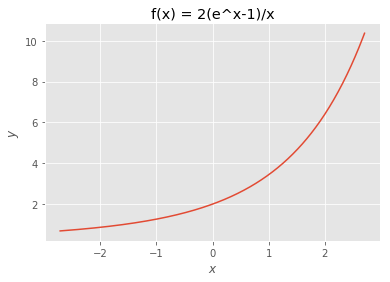

In [7]:
xs = np.arange(-np.e, np.e, 0.01)
ys = 2.*(np.exp(xs)-1)/xs
plt.plot(xs, ys);
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title ('f(x) = 2(e^x-1)/x');

### Límites y continuidad en 2D

Vamos a dibujar una gráfica en 2D, basada en rotar el gráfica de $f(x) = \sin(x)/x$ a lo largo del eje $z$.

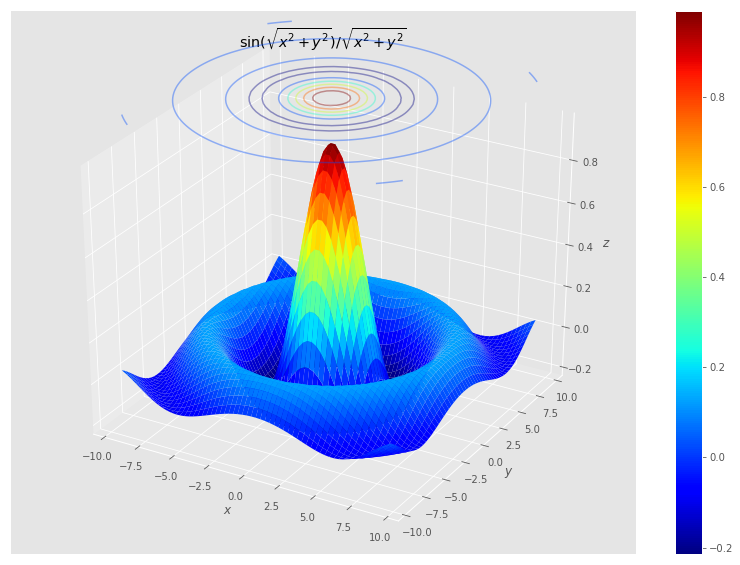

In [8]:
# import the Axis3D
from mpl_toolkits.mplot3d import Axes3D

# create a figure and an axi of 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# create xs, ys as arrays of 60 bins in the range [-3 pi, 3 pi]
xs = np.linspace(-3.*np.pi, 3.*np.pi, 60)
ys = np.linspace(-3.*np.pi, 3.*np.pi, 60)
# create xms, yms, the mesh used for the function
xms, yms = np.meshgrid(xs, ys)
# compute the function rms (the radius)
rms = np.sqrt(xms ** 2 + yms ** 2)
# compute now the 2D function values and stored into zms
zms = np.sin(rms)/rms

# cmap = plt.cm.hot
# other colormaps: plt.cm.jet, plt.cm.warmhot, plt.cm.Blues, plt.cm.plasma
cmap = plt.cm.jet
# draw the contour plot on top
ct = ax.contour(xms, yms, zms, zdir='z', offset=1.2, alpha=0.4, cmap=cmap)
# draw the surface 2D graph
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
# set the labes and the tile
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('$\sin(\sqrt{x^2 + y^2})/\sqrt{x^2+y^2}$')
# set the color bar 
fig.colorbar(sf, ax=ax);

**Cuestión:** La imagen es la gráfica en color de la función $f(x,y) = \sin(\sqrt{x^2+y^2})/\sqrt{x^2+y^2}$. ¿Tiene límite en el origen? ¿Es continua en el origen? ¿Qué son los discos que aparecen en la parte superior?  

**Cuestión:** ¿Qué simetría tiene la figura? ¿Qué coordenadas son más convenientes para dar esta función?

**Cuestión:** ¿Cuáles son los puntos máximos y mínimos en la zona dibujada? ¿Cuántos mínimos hay?

### Curvas de nivel

Vamos a dibujar la gráfica usando curvas de nivel (en mathplotlib es 'contour')

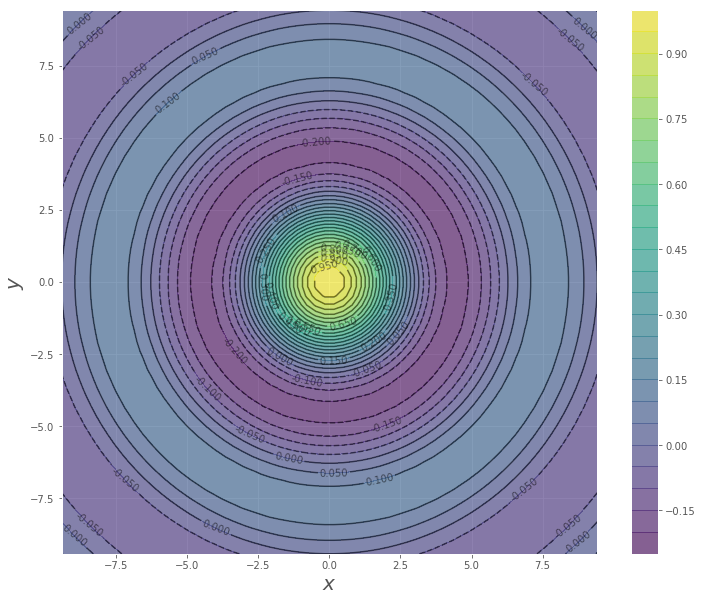

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))

# color fill contour
c0 = ax.contourf(xms, yms, zms, 25, alpha=0.6, cmp=plt.cm.jet)
# lines contour with values
c1 = ax.contour(xms, yms, zms, 25, colors='black', alpha=0.5, linewidth=.25);
c1.clabel(fontsize=10, inline=1)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
fig.colorbar(c0, ax=ax);

**Cuestión:** Esta es la misma gráfica, de la función $f(x,y) = \sin(\sqrt{x^2+y^2})/\sqrt{x^2+y^2}$, pero vista desde arriba, con las zonas en el plano $(x, y)$ coloreadas de un color para distintos rangos del valor de $z=f(x, y)$. ¿A qué puntos corresponde el valor de $z$=0? ¿Qué son las líneas? ¿A qué corresponden?

**Cuestión:** Si uno se mueve por las líneas de puntos ¿cambia el valor de la función $f(x, y)$, esto es, de $z$?

**Cuestión**: Si nos movemos, por ejemplo a lo largo del ene $x$ con $y=0$, ¿tienes una idea de en qué región la pendiente es más pronunciada, y en cuales más suave?

----

## ¡Taylor!

Vamos a dibujar una función y su desarrollo de Taylor. La siguiente figura muestra la gráfica de $f(x)=\sin(x)/x$, en el intervalo [-pi, pi] y su desarrollo de Taylor en torno al origen: $f(x) = 1 - x^2/6 + x^4/120+...$. Ver la región dónde el desarrollo de Taylor se aproxima a la función.

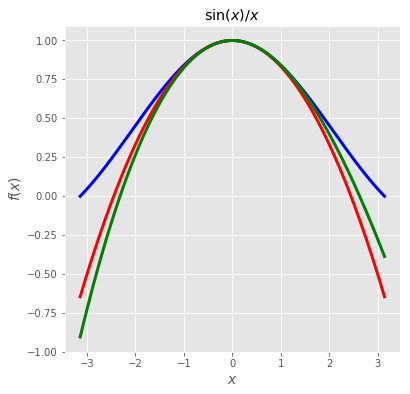

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

xs = np.linspace(-np.pi, np.pi, 200)
ys = np.sin(xs)/xs

ax.plot(xs,         ys              , color='blue' , lw=3)
ax.plot(xs, 1-xs*xs/6.              , color='red'  , lw=3)
ax.plot(xs, 1-xs*xs/6.+xs*xs*xs/120., color='green', lw=3)
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$f(x)$', fontsize=14)

ax.set_title('$\sin(x)/x$');

**Cuestión:** La línea azul corresponde a la gráfica de la función $\cos(x)$, mientras que los puntos rojos son valores de dicha función, las rectas rojas une dichos puntos. ¿Qué pasa si en vez de considerar 6 puntos dibujásemos 12? ¿Y 100? ¿Y cuándo ese número es muy grande? ¿Crees que la curva se podría dar como una sucesión de segmentos?

**Cuestión:** ¿Qué significa que hagamos el desarrollo de Taylor de una función $f(x)$? ¿Cómo se relaciona con la cuestión anterior?

**Prueba:** Puedes dibujar la curva $f(x) = e^{x}$ y los primeros desarrollos de Taylor alrededor de $x=0$ en el intervalo [0., 1.].

### desarrollo de taylor de una función 2D

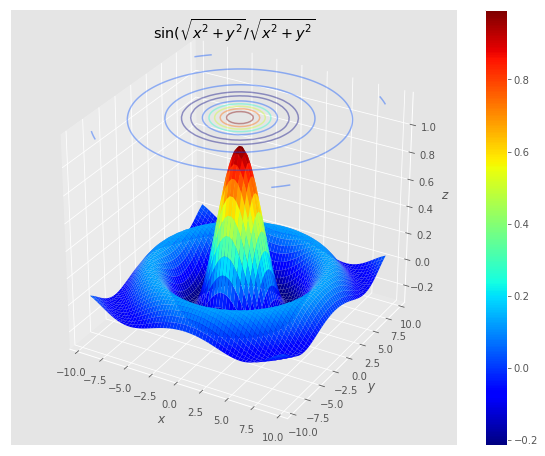

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# ax is a Axes3D object
xs = np.linspace(-3.*np.pi, 3.*np.pi, 60)
ys = np.linspace(-3.*np.pi, 3.*np.pi, 60)
xms, yms = np.meshgrid(xs, ys)
rms = np.sqrt(xms ** 2 + yms ** 2)
zms = np.sin(rms)/rms

# cmap = plt.cm.hot
# other colormaps: plt.cm.jet, plt.cm.warmhot, plt.cm.Blues, plt.cm.plasma
cmap = plt.cm.jet
ct = ax.contour(xms, yms, zms, zdir='z', offset=1.2, alpha=0.4, cmap=cmap)
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_zlim(-0.3, 1.2);
ax.set_title('$\sin(\sqrt{x^2 + y^2}/\sqrt{x^2+y^2}$')
fig.colorbar(sf, ax=ax);

**Cuestión:** Fíjate cómo esta dibujada la gráfica de la función $\sin\sqrt{x^2+y^2}/\sqrt{x^2+y^2}$. ¿Ves la teselas, como si fuera un mosáico en 3d? ¿Esas teselas son como pequeños planos? ¿Crees que las gráficas de algunas funciones se pueden dar como la collección de pequeños planos? ¿Eso será el desarollo de ...?

## Parametrización

**Ejercicio:** Considera un móvil con velocidad $(1, 2)$ *m/s* que pasa por $(0, 5)$ *m* ¿Puedes dibujar su trayectoria? 

**Cuestión:** ¿Cuál es la equación de la circunferencia de radio unidad? 

La siguiente celda muestra como parametrizad y dibujar una circunferencia de radio unidad centrada en el origen

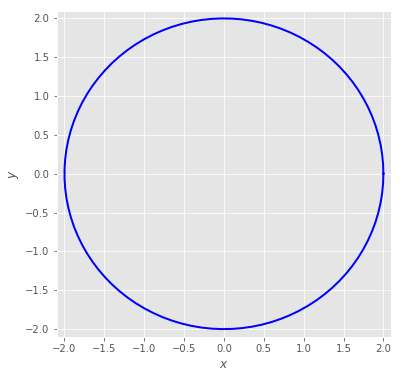

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
x0, y0 = 0., 0.
r = 2.

# the parameter is going to be phi
phis = np.linspace(0., 2.*np.pi, 100)

# x, y values for each phi
xs = x0+r*np.cos(phis)
ys = y0+r*np.sin(phis)

# plot
ax.plot(xs, ys, color='blue', lw=2)
ax.set_xlim([np.min(xs)-0.1, np.max(xs)+0.1])
ax.set_ylim([np.min(xs)-0.1, np.max(xs)+0.1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$');

**Prueba:** Puedes dibujar la circunferencia de radio 1 centrada en $(1, 1)$?

**Cuestión:** ¿Cual es la equación de los puntos de una circunferencia centrada en $(x_0, y_0)$ y de radio $r$? ¿Puedes parametrizarla?

Vamos a dibujar ahor una elipse.

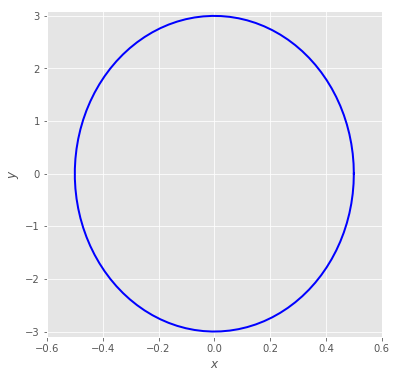

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
x0, y0 = 0., 0.
a, b = 0.5, 3.
r = 1.
phis = np.linspace(0., 2.*np.pi, 100)
xs = x0+a*np.cos(phis)
ys = y0+b*np.sin(phis)
ax.plot(xs, ys, color='blue', lw=2)
ax.set_ylim([np.min(ys)-0.1, np.max(ys)+0.1])
ax.set_xlim([np.min(xs)-0.1, np.max(xs)+0.1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$');

**Cuestión:** ¿Cómo está parametrizada esta trayectoria? 

**Prueba:** Modifica los parámetros e interpreta los cambios. ¿Cómo puedes convertir una elipse en una circunferencia?

**Prueba:** Puedes dibujar ahora una elipse centrada en $(1, 1)$ con ejes $a=1, b=2$?

**Cuestión:** ¿Puedes dar la ecuación de los puntos de una elipse centrada en $(x_0, y_0)$ y de ejes $(a, b)$?

Vamos a dibujar ahora una hélice. Que es la trayectoria de una partícula cargada en un campo magnético **B** uniforme.

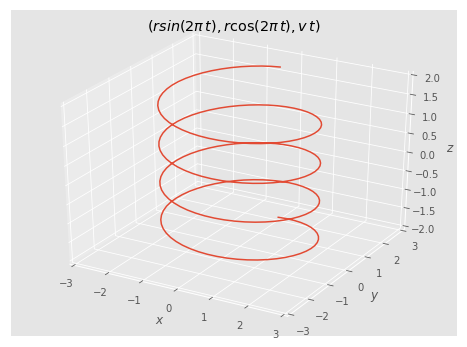

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
t = np.linspace(-2., 2., 200)
v, r = 1., 2.
z = v*t
x = r*np.sin(2.*np.pi*t)
y = r*np.cos(2.*np.pi*t)
ax.plot(x, y, z)
ax.set_xlim([-3., 3.])
ax.set_ylim([-3., 3.])
ax.set_zlim([-2., 2.])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$');
ax.set_title(r'$(r sin(2\pi\,t), r \cos(2 \pi \, t), v \, t)$');

**Cuestión:** ¿Cómo puedes dar los puntos del espacio que están en la hélice? ¿Cómo harías para recorrer todos los puntos de la hélice? 

**Prueba:** ¿Puedes parametrizar la hélice usando la coordenada $z$ como parámetro?

**Ejercicio:** Intenta parametrizar y dibujar la curva que deja una rueda de bicicleta cuando rueda por el pavimento.

----

## Maximos, mínimos y puntos silla

Vamos a dibujar las gráficas de funciones 2D y observar dónde están los máximos y los mínimos y deducir sus condiciones.

La primera función a estudiar es $f(x) = x^2+y^2$, abajo está la gráfica.

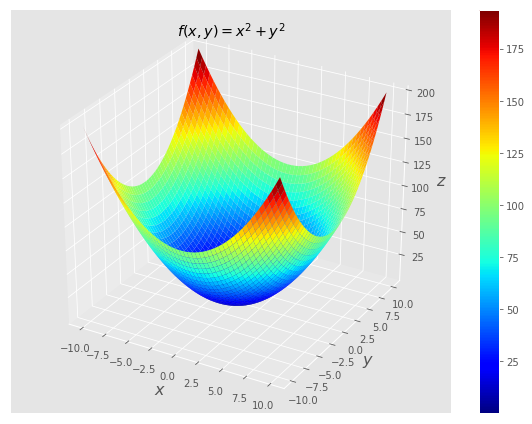

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

xs = np.linspace(-10., 10., 50)
ys = np.linspace(-10., 10., 50)

xms, yms = np.meshgrid(xs, ys)
zms = xms*xms+yms*yms

cmap = plt.cm.jet
# ax.view_init(0., 45.)
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
ax.set_title('$f(x,y) = x^2+y^2$')
fig.colorbar(sf, ax=ax);
fig.tight_layout();

**Cuestión:** ¿Dónde hay un mínimo en la función? ¿Por qué? 

**Cuestión:** ¿Esa gráfica tiene alguna simetría? ¿Qué coordenadas serían más naturales?

**Prueba:** Esta función nos da la distancia al cuadrado desde un punto al origen. ¿Puedes dibujar la gráfica de la función distanca de un punto al origen?

**Prueba:** Cambia la función para que el punto mínimo sea ahora un máximo.

Vamos a estudiar ahora si hay máximos y mínimos en la función $f(x, y)=x^2-y^2$

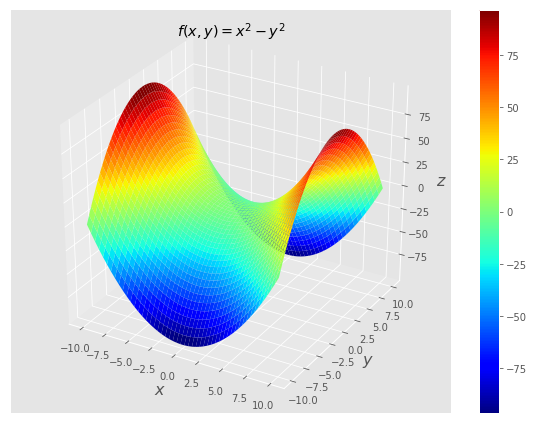

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

xs = np.linspace(-10., 10., 50)
ys = np.linspace(-10., 10., 50)

xms, yms = np.meshgrid(xs, ys)
zms = xms*xms-yms*yms

cmap = plt.cm.jet
# ax.view_init(0., 45.)
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
ax.set_title('$f(x,y) = x^2-y^2$')
fig.colorbar(sf, ax=ax);
fig.tight_layout();

**Cuestión**: ¿Qué tiene de peculiar el origen? ¿Es un máximo? ¿Un mínimo? 

**Cuestión:** En la gráfica, el origen es un punto silla. ¿Sabes por qué se le llama así?


**Cuestión:** Identifica los máximos y mínimos de la función $f(x, y) = \frac{\sin(x)}{x}$ mediante su gráfica en la región dada por $[-3\pi, 3\pi] \times [-3\pi, 3\pi]$.